In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [5]:
vt_name_to_observed_path = "/home/jsilverm/SynapseSeqAnalysis/objs/vt_freq_objs.pkl"
vt_density_obj = pickle.load(open(vt_name_to_observed_path, "rb"))
vt_name_to_density=vt_density_obj["vt_name_to_density"]
vt_name_to_observed = vt_density_obj["vt_name_to_n_observed"]

aav_pool_set = vt_name_to_observed.keys()

In [17]:

vt_id_lis = list(vt_name_to_observed.keys())
vt_id_to_int = {vt_id: inx for inx, vt_id in enumerate(vt_id_lis)}

int_to_count = {vt_id_to_int[vt_id]: vt_name_to_observed[vt_id] for vt_id in vt_id_to_int.keys()}

In [20]:
vt_count_arr = np.array([int_to_count[vt_int] for vt_int in vt_id_to_int.values()])

In [40]:
umi_arr = []
vt_id_int_lis = sorted(int_to_count.keys())

for vt_id in vt_id_int_lis:
    umi_arr.extend([vt_id] * int_to_count[vt_id])
umi_arr = np.array(umi_arr)

In [93]:


def plot_collision_rate(sampled_arr, title="", ax=None, max_dup=10):
    if ax is None:
        fig, ax = plt.subplots()
    id, freqs = np.unique(sampled_arr, return_counts=True)
    total_counts = sampled_arr.shape[0]
    total_dupes = freqs[freqs > 1].sum()
    prop_single = (total_counts - total_dupes) / total_counts
    mean_count_per_vt = freqs.mean()
    
    x_bins = np.arange(1, max_dup+1, 1)
    counts_lis = []
    for inx, count_val in enumerate(x_bins):
        if count_val < max_dup:
            count_sum = freqs[freqs == count_val].sum()
        else:
            count_sum = freqs[freqs >= count_val].sum()
        counts_lis.append(count_sum)
    counts_arr = np.array(counts_lis)
    props = counts_arr / counts_arr.sum()
    bars = ax.bar(x_bins, props, align='center', edgecolor='black')
    
    
    for bar, prop in zip(bars, props):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f'{prop:.2%}',
                ha='center', va='bottom', fontsize=9)
    
    xtick_labels = [str(count) if count < max_dup else f"{count}+" for count in x_bins]
    ax.set_xticks(x_bins)
    ax.set_xticklabels(xtick_labels)
    ax.set_title(title)

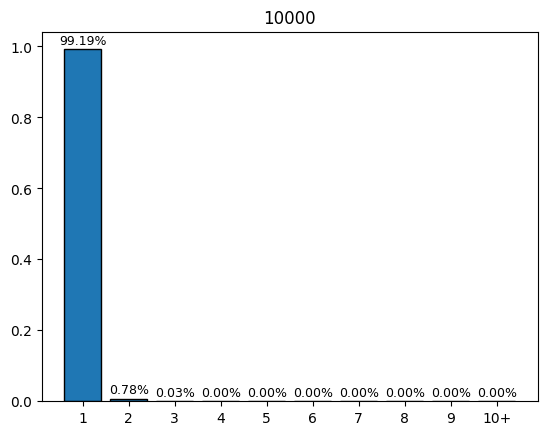

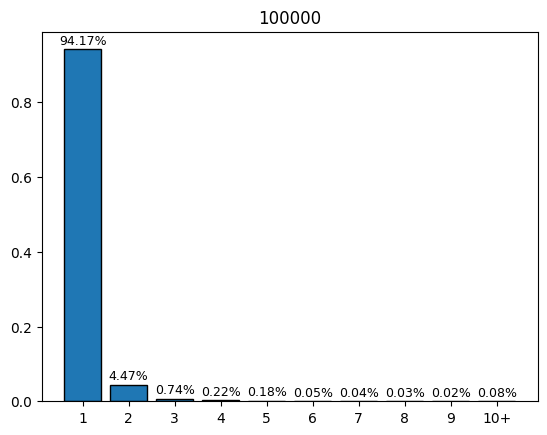

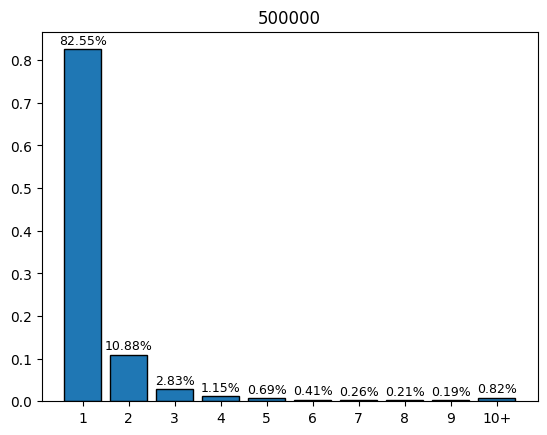

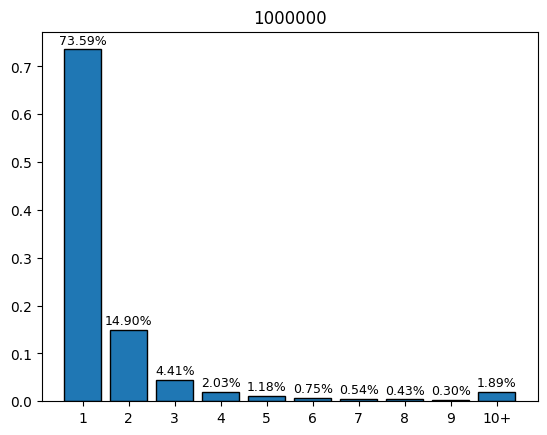

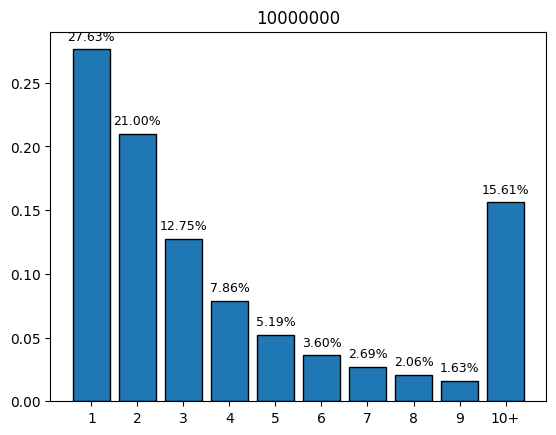

In [99]:
n_umis_test = [1e4, 1e5, 5e5, 1e6,  1e7]

for inx, n_samples in enumerate(n_umis_test):
    sampled_indices = np.random.choice(umi_arr.shape[0], size=int(n_samples), replace=True)
    sampled_arr = umi_arr[sampled_indices]
    plot_collision_rate(sampled_arr, title=int(n_samples))